In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.sparse import hstack

# Cargar tus datos en un DataFrame de pandas (asegúrate de tener las bibliotecas instaladas)
# df_train = pd.read_csv('ruta/del/archivo.csv')
train_file = 'verbalAutopsy_train.csv'
test_file = 'verbalAutopsy_test.csv'
train = pd.read_csv(train_file)
y_train = train['gs_text34']

# Seleccionar las columnas 'age', 'sex' y 'open_response'
#train = train[['age', 'sex', 'open_response']]
vectorizer = TfidfVectorizer()
texto = vectorizer.fit_transform(train["open_response"])
train['texto']
module_mapping = {"Neonate": 0, "Child": 1, "Adult": 2}
train['module'] = train['module'].map(module_mapping)

numeric_scaler = StandardScaler()
# Estandarizar las columnas numéricas por separado

X_numeric = numeric_scaler.fit_transform(train[['age', 'sex','module','texto']])
# Fusionar las características de texto y las columnas numéricas
X_train = hstack([ X_numeric])


ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

Entrenamiento de los modelos

['Cirrhosis' 'Diarrhea/Dysentery' 'Other Cardiovascular Diseases'
 'Stillbirth' 'Suicide' 'Preterm Delivery' 'Other Infectious Diseases'
 'AIDS' 'Road Traffic' 'Cervical Cancer' 'Other Non-communicable Diseases'
 'Leukemia/Lymphomas' 'Epilepsy' 'Falls' 'COPD' 'Renal Failure'
 'Congenital malformation' 'Drowning' 'Colorectal Cancer' 'Stroke'
 'Breast Cancer' 'Poisonings' 'Meningitis' 'Sepsis' 'Other Injuries'
 'Pneumonia' 'Meningitis/Sepsis' 'Acute Myocardial Infarction'
 'Other Defined Causes of Child Deaths' 'Birth asphyxia' 'Maternal'
 'Asthma' 'Fires' 'TB' 'Diabetes' 'Malaria' 'Lung Cancer'
 'Bite of Venomous Animal' 'Encephalitis' 'Other Cancers' 'Homicide'
 'Hemorrhagic fever' 'Measles' 'Esophageal Cancer' 'Violent Death'
 'Stomach Cancer' 'Other Digestive Diseases' 'Prostate Cancer']


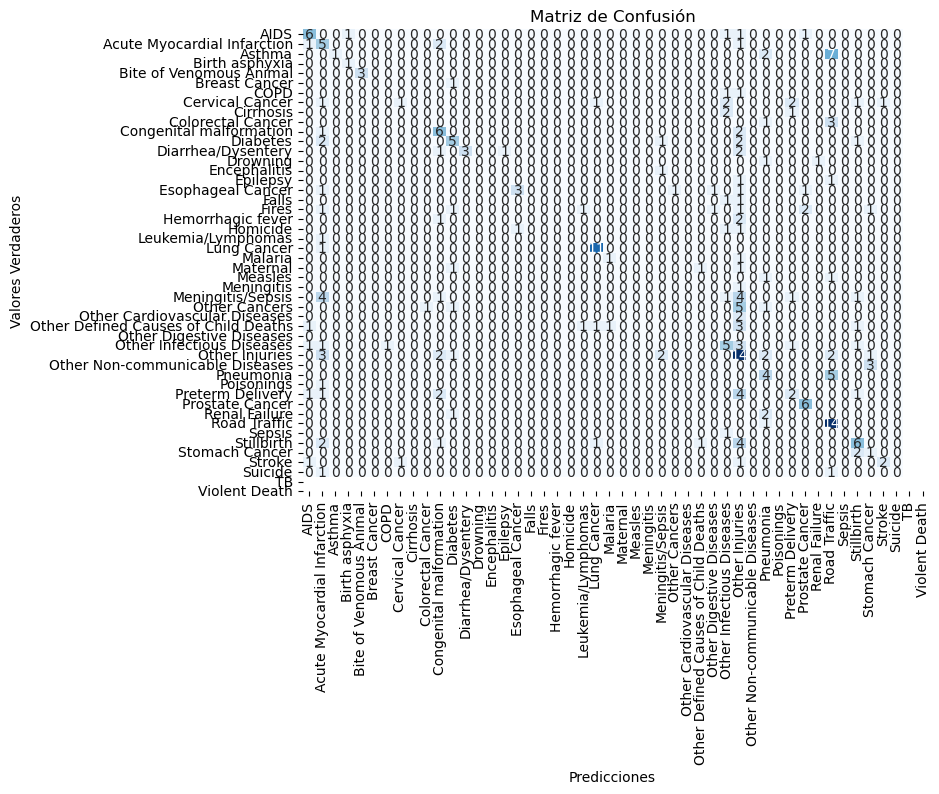

ValueError: Negative values in data passed to MultinomialNB (input X)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Obtener todos los valores únicos de y_train
unique_labels = y_train.unique()
print(unique_labels)
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Entrenar modelos
rf_model = RandomForestClassifier(random_state=42)
nb_model = MultinomialNB()
lr_model = LogisticRegression(random_state=42)

models = [rf_model, nb_model, lr_model]
model_names = ['Random Forest', 'Naive Bayes', 'Logistic Regression']

f_scores = []
confusion_matrices = []

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular F-score
    f_score = f1_score(y_test, y_pred, average='weighted')
    f_scores.append(f_score)
    
    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Verdaderos")
    plt.title("Matriz de Confusión")
    plt.show()

# Visualizar F-scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, f_scores, color=['blue', 'green', 'red'])
plt.title('F-score Comparison')
plt.xlabel('Models')
plt.ylabel('F-score')
plt.show()
